### pycocotools를 이용한 COCO 데이터 액세스와 Segmentation Masking 시각화
* pycocotools 사용부분은 https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb 를 참조하였음. 
* pycocotools를 활용하여 coco dataset을 탐색
* pycocotools는 colab에서 이미 설치됨. 
* pycocotools 설치는 pip로 설치 시 오류가 발생하기 쉬우므로 conda 로 설치하거나 아예 git에서 소스코드를 다운로드 받아서 설치. 


In [ ]:
from pycocotools.coco import COCO # Main Class :: 여기서 libraries import

import numpy as np

### COCO 데이터 세트 Annotation 다운로드 
1. COCO 데이터 세트는 아래에서 다운로드 가능
http://cocodataset.org/#download

2. 2017 Train/Val annotation 압축 파일을 다운로드 한 뒤, /content/data에 압축 해제  
2017년 Train image 파일 다운로드: wget http://images.cocodataset.org/zips/train2017.zip  
2017년 Val image 파일 다운로드: wget http://images.cocodataset.org/zips/val2017.zip  
2017년 Train/Val annoation 파일 다운로드: http://images.cocodataset.org/annotations/annotations_trainval2017.zip  


In [ ]:
!mkdir -p /content/data

In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip -d /content/data

--2022-03-16 05:59:37--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.133.155
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.133.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  85.6MB/s    in 2.8s    

2022-03-16 05:59:40 (85.6 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: /content/data/annotations/instances_train2017.json  
  inflating: /content/data/annotations/instances_val2017.json  
  inflating: /content/data/annotations/captions_train2017.json  
  inflating: /content/data/annotations/captions_val2017.json  
  inflating: /content/data/annotations/person_keypoints_train2017.json  
  inflating: /content/data/annotations/person_keypoints

### COCO Annotation 정보 확인하기

In [ ]:
dataDir='/content/data'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
print(annFile)

/content/data/annotations/instances_val2017.json


In [ ]:
# 19MB 정도 나옴
!ls -lia /content/data/annotations/instances_val2017.json

4718603 -rw-rw-r-- 1 root root 19987840 Sep  1  2017 /content/data/annotations/instances_val2017.json


In [ ]:
!sudo apt-get install jq # json 가독성 좋게 만드는 jq 유틸리티

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libjq1 libonig4
The following NEW packages will be installed:
  jq libjq1 libonig4
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 276 kB of archives.
After this operation, 930 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libonig4 amd64 6.7.0-1 [119 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libjq1 amd64 1.5+dfsg-2 [111 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 jq amd64 1.5+dfsg-2 [45.6 kB]
Fetched 276 kB in 1s (338 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initialize fron

In [ ]:
!jq . /content/data/annotations/instances_val2017.json > output.json # 출력을 output.json으로 해라

In [ ]:
!head -200 output.json

{
  "info": {
    "description": "COCO 2017 Dataset",
    "url": "http://cocodataset.org",
    "version": "1.0",
    "year": 2017,
    "contributor": "COCO Consortium",
    "date_created": "2017/09/01"
  },
  "licenses": [
    {
      "url": "http://creativecommons.org/licenses/by-nc-sa/2.0/",
      "id": 1,
      "name": "Attribution-NonCommercial-ShareAlike License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-nc/2.0/",
      "id": 2,
      "name": "Attribution-NonCommercial License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-nc-nd/2.0/",
      "id": 3,
      "name": "Attribution-NonCommercial-NoDerivs License"
    },
    {
      "url": "http://creativecommons.org/licenses/by/2.0/",
      "id": 4,
      "name": "Attribution License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-sa/2.0/",
      "id": 5,
      "name": "Attribution-ShareAlike License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-nd/2.0/

In [ ]:
!tail -600 output.json

          117,
          127,
          84,
          99,
          40,
          1,
          77,
          128,
          81,
          101,
          36,
          4,
          79,
          129,
          77,
          103,
          32,
          8,
          79,
          131,
          73,
          104,
          30,
          10,
          82,
          131,
          69,
          107,
          24,
          15,
          84,
          131,
          65,
          110,
          18,
          19,
          87,
          130,
          62,
          116,
          6,
          26,
          89,
          131,
          58,
          149,
          91,
          132,
          54,
          151,
          92,
          133,
          50,
          152,
          94,
          134,
          46,
          153,
          95,
          135,
          43,
          155,
          93,
          135,
          43,
          156,
          93,
          134,
          43,
          1

In [ ]:
# annotations이 들어가 있는 위치 찾기
!grep -n 'annotations' output.json

50054:  "annotations": [


In [ ]:
# 위에서 50300까지 읽고 뒤에서 300까지 표시
!head -50300 output.json | tail -300  

      "id": 220310
    },
    {
      "license": 3,
      "file_name": "000000512403.jpg",
      "coco_url": "http://images.cocodataset.org/val2017/000000512403.jpg",
      "height": 640,
      "width": 529,
      "date_captured": "2013-11-24 05:12:53",
      "flickr_url": "http://farm1.staticflickr.com/143/350452845_fa743a9623_z.jpg",
      "id": 512403
    },
    {
      "license": 4,
      "file_name": "000000168974.jpg",
      "coco_url": "http://images.cocodataset.org/val2017/000000168974.jpg",
      "height": 500,
      "width": 375,
      "date_captured": "2013-11-24 07:19:48",
      "flickr_url": "http://farm3.staticflickr.com/2360/2063838083_64f7514c79_z.jpg",
      "id": 168974
    },
    {
      "license": 1,
      "file_name": "000000552775.jpg",
      "coco_url": "http://images.cocodataset.org/val2017/000000552775.jpg",
      "height": 500,
      "width": 375,
      "date_captured": "2013-11-24 10:38:31",
      "flickr_url": "http://farm4.staticflickr.com/3136/3106037881_9

### COCO API를 활용하기 위해 annotation 파일을 COCO 객체로 로드하기

In [32]:
# annotation 파일을 COCO객체로 로드하면 다양한 COCO객체의 API들을 이용하여 COCO DATASET 활용 가능
from pycocotools.coco import COCO

# coco.py보면 class COCO의 생성자로 annotation 파일 input
coco=COCO(annFile) # coco 객체 생성

loading annotations into memory...
Done (t=1.07s)
creating index...
index created!


#### Category 정보를 가져 오기

In [ ]:
# getCatIds()는 COCO Dataset의 category id를 리스트로 반환
print(coco.getCatIds())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]


In [ ]:
# loadCats()는 category id 리스트를 입력받아 category들에 대한 세부 정보를 여러 개의 딕셔너리를 개별 원소를 가지는 리스트로 반환
cats = coco.loadCats(coco.getCatIds())
cats

[{'id': 1, 'name': 'person', 'supercategory': 'person'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'vehicle'},
 {'id': 3, 'name': 'car', 'supercategory': 'vehicle'},
 {'id': 4, 'name': 'motorcycle', 'supercategory': 'vehicle'},
 {'id': 5, 'name': 'airplane', 'supercategory': 'vehicle'},
 {'id': 6, 'name': 'bus', 'supercategory': 'vehicle'},
 {'id': 7, 'name': 'train', 'supercategory': 'vehicle'},
 {'id': 8, 'name': 'truck', 'supercategory': 'vehicle'},
 {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'},
 {'id': 10, 'name': 'traffic light', 'supercategory': 'outdoor'},
 {'id': 11, 'name': 'fire hydrant', 'supercategory': 'outdoor'},
 {'id': 13, 'name': 'stop sign', 'supercategory': 'outdoor'},
 {'id': 14, 'name': 'parking meter', 'supercategory': 'outdoor'},
 {'id': 15, 'name': 'bench', 'supercategory': 'outdoor'},
 {'id': 16, 'name': 'bird', 'supercategory': 'animal'},
 {'id': 17, 'name': 'cat', 'supercategory': 'animal'},
 {'id': 18, 'name': 'dog', 'supercategory': 'animal'},

In [ ]:
# COCO Category와 Super Category 출력

nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
outdoor animal appliance electronic sports furniture person indoor kitchen food accessory vehicle


### 지정된 이미지를 데이터 세트에서 로드하기 

In [ ]:
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
print(catIds)

# oco.getImgIds(catIds=catIds)는 해당 catogory id별로 한개의 image id을 임의로 출력
imgIds = coco.getImgIds(catIds=catIds )
print(imgIds)

[1, 18, 41]
[549220, 324158, 279278]


In [ ]:
#loadImgs()는 인자로 들어온 image id에 대한 메타 정보를 딕셔너리를 개별 원소로 가지는 리스트로 반환
img = coco.loadImgs(324158)
print(img)

# 전체 리스트는 필요 없고 내부 딕셔너리만 필요하므로 [0]으로 내부 딕셔너리 추출 
print("\n내부 딕셔너리 파일 메타정보 추출")
img = coco.loadImgs(324158)[0]
print(img)

[{'license': 1, 'file_name': '000000324158.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg', 'height': 334, 'width': 500, 'date_captured': '2013-11-19 23:54:06', 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg', 'id': 324158}]

내부 딕셔너리 파일 메타정보 추출
{'license': 1, 'file_name': '000000324158.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg', 'height': 334, 'width': 500, 'date_captured': '2013-11-19 23:54:06', 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg', 'id': 324158}


#### COCO 이미지를 다운로드 후 시각화

In [ ]:
coco_url = img['coco_url']
print(coco_url)

http://images.cocodataset.org/val2017/000000324158.jpg


In [ ]:
import urllib.request

def download_image(url, target_path):
  urllib.request.urlretrieve(url, target_path) # urlretrieve : url에 접근해서 이미지 같은 것을 저장할 path 지정 (target_path) 

download_image(img['coco_url'], '/content/data/' + img['file_name']) 


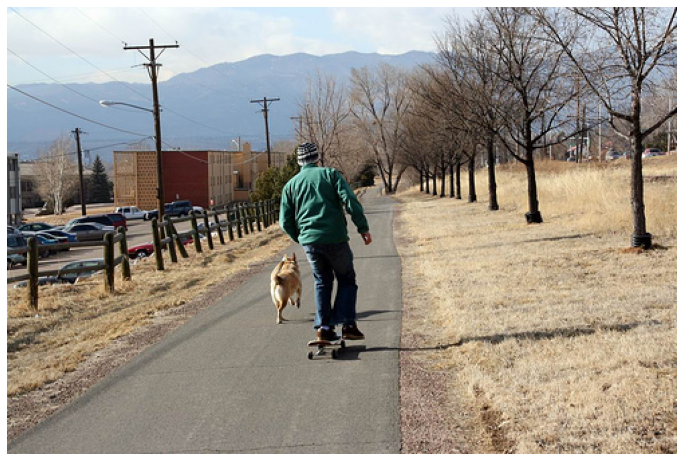

In [ ]:
import cv2
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

file_path = '/content/data/' + img['file_name']

image_array = cv2.imread(file_path)
image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 14))
plt.axis('off')
plt.imshow(image_array)
plt.show()

### Instance Segmentation 시각화 - COCO API 활용한 시각화
* getAnnIds()로 특정 image에 해당하는 annotation id를 가져온 후에 이 id를 loadAnns()로 입력하여 해당 이미지의 모든 annotation 정보를 가져옴. 
* segmentation 정보는 polygon 형태로 되어 있음. 
* annotation 정보를 coco.showAnns(anns)에 입력하여 instance segmentation 시각화 수행. 

In [ ]:
# 해당 image의 annotation을 가져오기 위해서 getAnnIds() 를 이용함. 인자로 image의 id(파일명이 아님)와 category id를 입력
# 하나의 image는 segmentation별로 여러개의 annotation을 가질 수 있음
# 개별 annotation은 하나의 이미지에 소속이 됨

annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
annIds # 하나의 이미지에 여러 obj에 대한 annotation 정보 존재 (여기선 3개)

[10673, 638724, 2162813]

In [ ]:
# loadAnns()에 annotation id를 리스트로 입력하면 annotation 정보들을 반환함. 
# 특정 img id에 대한 anno 정보를 가져옴

anns = coco.loadAnns(annIds)
anns # 개별 obj에 대한 정보

[{'area': 759.3375500000002,
  'bbox': [196.51, 183.36, 23.95, 53.02],
  'category_id': 18,
  'id': 10673,
  'image_id': 324158,
  'iscrowd': 0,
  'segmentation': [[216.7,
    211.89,
    216.16,
    217.81,
    215.89,
    220.77,
    215.89,
    223.73,
    217.77,
    225.35,
    219.12,
    224.54,
    219.12,
    220.5,
    219.66,
    217.27,
    219.93,
    212.7,
    220.46,
    207.85,
    219.66,
    203.01,
    218.85,
    198.43,
    217.77,
    195.74,
    216.7,
    194.93,
    215.62,
    190.62,
    215.62,
    186.59,
    214.27,
    183.89,
    211.85,
    184.16,
    211.85,
    187.66,
    210.24,
    187.66,
    209.16,
    184.97,
    207.81,
    183.36,
    205.12,
    186.59,
    205.12,
    189.28,
    201.08,
    192.78,
    199.74,
    195.2,
    196.78,
    200.04,
    196.51,
    203.01,
    198.12,
    205.43,
    197.32,
    209.2,
    196.78,
    213.23,
    197.05,
    218.89,
    199.74,
    221.85,
    201.62,
    225.35,
    201.62,
    233.69,
    2

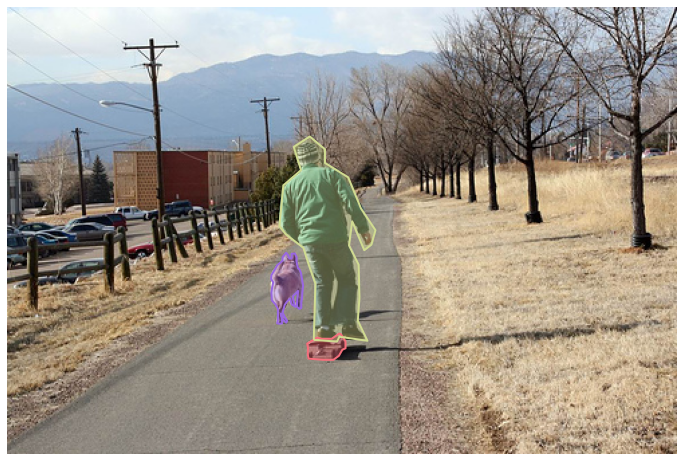

In [ ]:
# showAnns( )는 annotation 정보들을 입력 받아서 알아서 Visualization 시켜줌. 단 먼저 matplotlib 객체로 원본 이미지가 먼저 로드되어 있어야 함. 
plt.figure(figsize=(12, 14))
plt.imshow(image_array)
plt.axis('off')

coco.showAnns(anns)

다른 패키지에도 그림을 그려주는 api가 있는데도 pixel by pixel로 그림을 그려주는  api를 해야되는 이유
- 보다 다양한 상황에 application 해야 되는 경우에 showAnns 같은 것들이 커버가 안될 때가 있음

### Polygon Annotation 정보를 이용하여 Instance Segmentation 시각화
* Polygon 정보를 직접 추출하여 이를 시각화
* polygon 정보를 coco API를 활용하여 masking 형태로 변환 후 해당 masking을 원본 이미지에 적용하여 시각화.  

In [33]:
# 3개의 object가 3개의 dict로 개별 obj에 대한 annotation 정보들을 가지고 있음

len(anns), type(anns[0])

(3, dict)

In [35]:
anns[1]

{'area': 409.74355,
 'bbox': [223.48, 243.72, 28.67, 19.61],
 'category_id': 41,
 'id': 638724,
 'image_id': 324158,
 'iscrowd': 0,
 'segmentation': [[223.48,
   251.26,
   230.81,
   246.74,
   234.48,
   247.6,
   241.8,
   247.6,
   247.41,
   243.72,
   248.7,
   244.15,
   252.15,
   249.54,
   252.15,
   254.71,
   249.78,
   255.79,
   247.19,
   260.32,
   243.1,
   263.33,
   235.77,
   263.33,
   224.56,
   262.47,
   223.91,
   259.24,
   224.13,
   254.5]]}

In [36]:
# 앞에서 추출한 annotations 정보를 가지는 anns list의 의 3번째 값(인덱스 2)에서 segmentation polygon 값만 추출
print(anns[2]['segmentation'])
ann_2_seg = anns[2]['segmentation'][0] # list의 list 구조에서 안쪽 list 가져오려고 [0] 붙임 (첫번째 요소 가져오세요~)
print(type(ann_2_seg), len(ann_2_seg))
print(ann_2_seg) # 52개의 요소가 있음,  x, y ,x, y 이렇게 연달아 있음

[[228.43, 247.9, 229.63, 206.62, 224.24, 191.07, 220.65, 179.7, 207.49, 169.53, 202.71, 163.55, 205.7, 133.04, 218.86, 121.68, 213.47, 104.33, 225.44, 96.55, 236.8, 106.12, 236.8, 116.29, 254.15, 127.06, 263.72, 150.39, 274.49, 166.54, 271.5, 177.31, 266.12, 181.5, 257.14, 159.96, 254.75, 177.91, 261.93, 192.27, 262.53, 216.79, 261.33, 234.14, 268.51, 249.1, 247.57, 246.11, 245.78, 249.69, 229.03, 248.5]]
<class 'list'> 52
[228.43, 247.9, 229.63, 206.62, 224.24, 191.07, 220.65, 179.7, 207.49, 169.53, 202.71, 163.55, 205.7, 133.04, 218.86, 121.68, 213.47, 104.33, 225.44, 96.55, 236.8, 106.12, 236.8, 116.29, 254.15, 127.06, 263.72, 150.39, 274.49, 166.54, 271.5, 177.31, 266.12, 181.5, 257.14, 159.96, 254.75, 177.91, 261.93, 192.27, 262.53, 216.79, 261.33, 234.14, 268.51, 249.1, 247.57, 246.11, 245.78, 249.69, 229.03, 248.5]


In [37]:
 # x,y 좌표값이 연이어 되어 있는 list형 polygon segmentation 정보를 x,y 쌍 형태로 변환. 
 # enumerate로 index값 뽑아서 그걸 % 연산해서 짝수면 x, 홀수면 y
 # 좌표값 (좌표 위치가 float형태로 나올 수는 없긴 함)

 polygon_x = [x for index, x in enumerate(ann_2_seg) if index % 2 == 0]
 polygon_y = [x for index, x in enumerate(ann_2_seg) if index % 2 == 1]
 print('polygon_x:', polygon_x)
 print('polygon_y:', polygon_y)

 # zip으로 묶어서 한 형태로 가져옴
 polygon_xy = [[x, y] for x, y in zip(polygon_x, polygon_y)]
 print('polygon_xy:', polygon_xy)

polygon_x: [228.43, 229.63, 224.24, 220.65, 207.49, 202.71, 205.7, 218.86, 213.47, 225.44, 236.8, 236.8, 254.15, 263.72, 274.49, 271.5, 266.12, 257.14, 254.75, 261.93, 262.53, 261.33, 268.51, 247.57, 245.78, 229.03]
polygon_y: [247.9, 206.62, 191.07, 179.7, 169.53, 163.55, 133.04, 121.68, 104.33, 96.55, 106.12, 116.29, 127.06, 150.39, 166.54, 177.31, 181.5, 159.96, 177.91, 192.27, 216.79, 234.14, 249.1, 246.11, 249.69, 248.5]
polygon_xy: [[228.43, 247.9], [229.63, 206.62], [224.24, 191.07], [220.65, 179.7], [207.49, 169.53], [202.71, 163.55], [205.7, 133.04], [218.86, 121.68], [213.47, 104.33], [225.44, 96.55], [236.8, 106.12], [236.8, 116.29], [254.15, 127.06], [263.72, 150.39], [274.49, 166.54], [271.5, 177.31], [266.12, 181.5], [257.14, 159.96], [254.75, 177.91], [261.93, 192.27], [262.53, 216.79], [261.33, 234.14], [268.51, 249.1], [247.57, 246.11], [245.78, 249.69], [229.03, 248.5]]


(-0.5, 499.5, 333.5, -0.5)

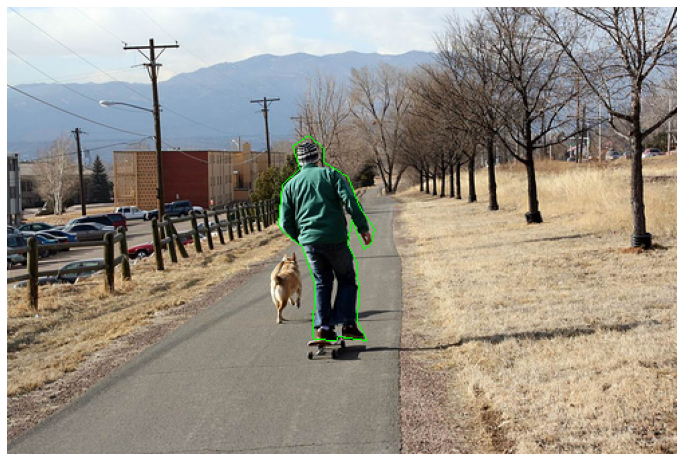

In [39]:
import numpy as np

# opencv의 polylines를 이용하여 변환된 polygon 좌표 적용하여 instance segmentation 외곽선 시각화
green_color = (0, 255, 0)

draw_img = image_array.copy() # copy용 생성 / img_array로 들어가면 원본이미지로 바로 적용이 되기 때문
polygon_xy = np.array(polygon_xy, np.int32) # polygon_xy를 array 형태로 취하기 + 소숫점 버리기 위해 int형태로 변환

# ploylines쓸 때 좌표값을(현재 array) list로 감싸줘야 함
draw_img = cv2.polylines(draw_img, [polygon_xy], True, (0, 255, 0))

plt.figure(figsize=(12, 14))
plt.imshow(draw_img)
plt.axis('off')

(-0.5, 499.5, 333.5, -0.5)

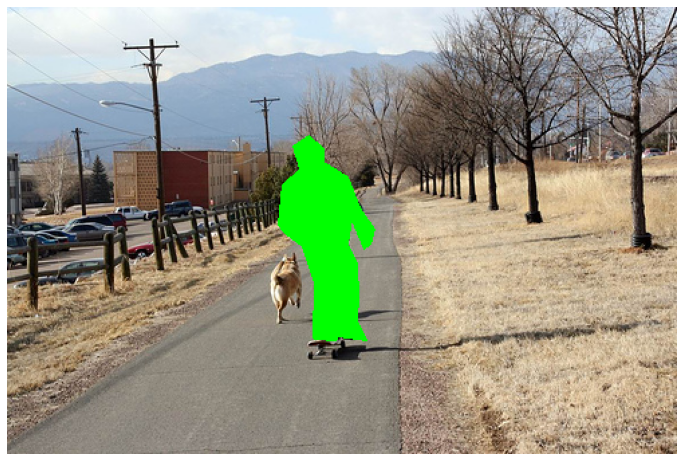

In [40]:
# opencv의 fillPoly를 이용하여 변환된 polygon 좌표 적용하여 instance segmentation 내부 시각화
green_color = (0, 255, 0)

draw_img = image_array.copy()
polygon_xy = np.array(polygon_xy, np.int32)
draw_img = cv2.fillPoly(draw_img, [polygon_xy], (0, 255, 0))

plt.figure(figsize=(12, 14))
plt.imshow(draw_img)
plt.axis('off')

In [41]:
# coco api의 annToMask()를 이용하여 polygon을 mask 형태로 변환

mask = coco.annToMask(anns[2])
print('image shape:', image_array.shape, 'mask shape:', mask.shape)
print('0보다 큰 값이 있는 mask shape:', mask[mask > 0].shape, '0이 있는 mask shape:', mask[mask == 0].shape)
print(mask[mask > 0])

image shape: (334, 500, 3) mask shape: (334, 500)
0보다 큰 값이 있는 mask shape: (6014,) 0이 있는 mask shape: (160986,)
[1 1 1 ... 1 1 1]


일반적으로 Mask는 2차원 형태로 표현됨 (평면적이라서 다른 차원을 가질 필요가 없음)


(-0.5, 499.5, 333.5, -0.5)

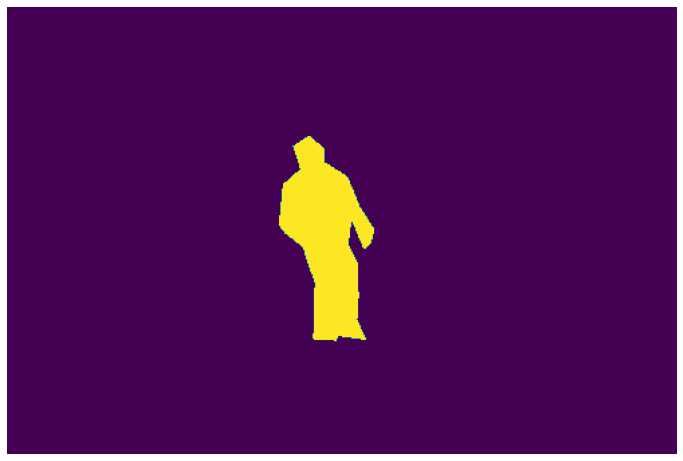

In [44]:
plt.figure(figsize=(12, 14))
plt.imshow(mask)
plt.axis('off')

### Polygon 정보를 mask로 변환하여 Instance Segmentation 시각화 
* cv2.fillPoly()로 polygon을 mask형태로 변환.
* layer별 masking 영역에서 0을 제외한 pixel 영역을 layer별 시각화

In [48]:
np.zeros(image_array.shape[0:2])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

zero_mask shape: (334, 500) mask shape: (334, 500)
masked_polygon 0보다 큰 값: [1. 1. 1. ... 1. 1. 1.]
(6184,) (160816,)


(-0.5, 499.5, 333.5, -0.5)

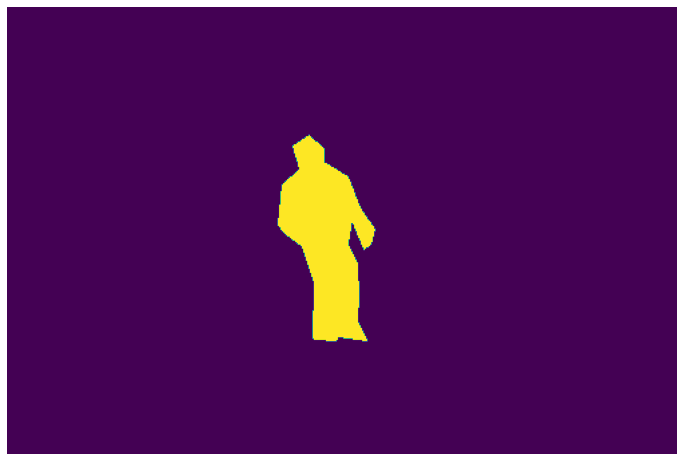

In [49]:
## polygon 정보를 mask 정보로 변환. 


zero_mask = np.zeros(image_array.shape[0:2]) # mask 정보는 2차원 선호
masked_polygon = cv2.fillPoly(zero_mask, [polygon_xy], 1) # 1 :: obj 좌표 픽셀에 다 111111이렇게 들어감
print('zero_mask shape:', zero_mask.shape, 'mask shape:', masked_polygon.shape)
print('masked_polygon 0보다 큰 값:', masked_polygon[masked_polygon > 0])
print(masked_polygon[masked_polygon > 0].shape, masked_polygon[masked_polygon == 0].shape)

plt.figure(figsize=(12, 14))
plt.imshow(masked_polygon)
plt.axis('off')

In [50]:
# 보통 bool 값으로 masking 정보 제공. 

masked_bool = masked_polygon.astype(bool)
print('masked_bool shape:', masked_bool.shape)
print(masked_bool[masked_bool==1].shape, masked_bool[masked_bool==0].shape)
print(masked_bool[masked_bool==1])

masked_bool shape: (334, 500)
(6184,) (160816,)
[ True  True  True ...  True  True  True]


In [51]:
# mask 값에 따라 channel 별로 alpha값 (탁하게 or 투명하게)을 감안하여 색상 적용

def apply_mask_01(image, mask, color, alpha=0.5):
  for c in range(3): # 채널별로 돔 (rgb가 3채널이니깐)

                    # np.where :: mask==1이면 , a적용, 아니면 b
    image[:, :, c] = np.where(mask == 1, # mask가 1이면 obj가 있는 픽셀에 색상을 입힘
                              image[:, :, c] * # a
                              (1 - alpha) + alpha * color[c] * 255, 
                              image[:, :, c]) # b
  return image

(-0.5, 499.5, 333.5, -0.5)

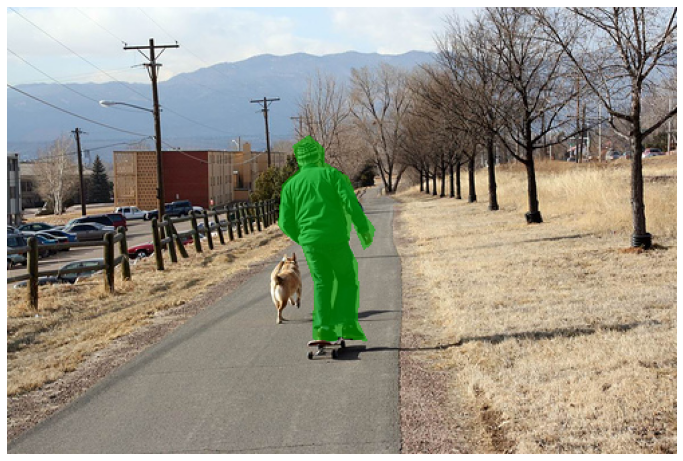

In [52]:
draw_img = image_array.copy()

# masking 정보는 2차원 bool array로 전달. 
masked_image = apply_mask_01(draw_img, masked_bool, (0, 255, 0), alpha=0.6)

plt.figure(figsize=(12, 14))
plt.imshow(masked_image)
plt.axis('off')

위의 for문으로 인한 속도가 아쉬울 땐 np.stack으로 어느 정도 개선 시도 가능

In [53]:
def apply_mask_02(image, mask, color, alpha=0.5):
  """Apply the given mask to the image.
  """
  # mask를 3차원으로 만들어줘야함 
  # 그래서 np.stack 으로 3차원 만듬
  image = np.where(mask == 1, color, image)
  return image

In [55]:
# 기존에 있는 masking 값을 계속 쌓아놓는 것 (3번 쌓음)

 np.stack([masked_bool, masked_bool, masked_bool], axis=2).shape

(334, 500, 3)

(-0.5, 499.5, 333.5, -0.5)

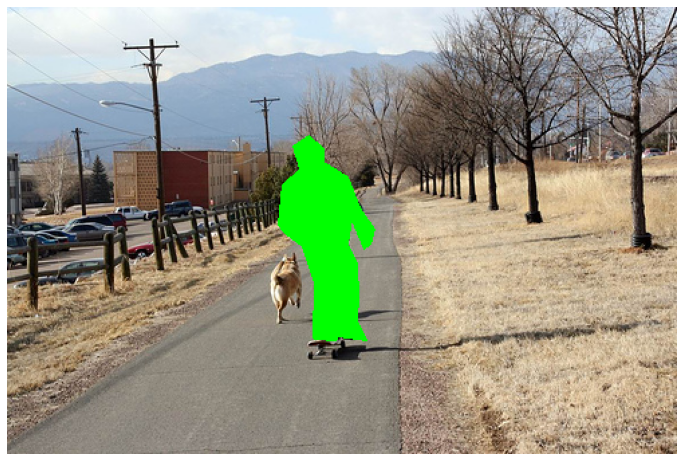

In [54]:
draw_img = image_array.copy()

stacked_mask = np.stack([masked_bool, masked_bool, masked_bool], axis=2)
masked_image = apply_mask_02(draw_img, stacked_mask, (0, 255, 0))
plt.figure(figsize=(12, 14))
plt.imshow(masked_image)
plt.axis('off')

### bitwise_and 연산으로 오브젝트 영역을 제외하고 나머지 영역은 모두 0 처리하기

(-0.5, 499.5, 333.5, -0.5)

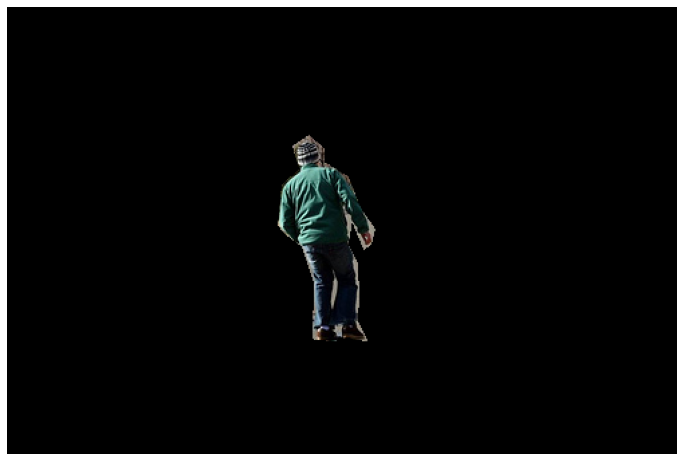

In [57]:
# True는 255로, False는 0으로 변환. 
# 1 * 255 = 255 / 0 * 255 = 0
# 앞에 bool로 만든 형태를 255를 곱해서 숫자형태로 변환
s_mask_int = (masked_bool * 255).astype("uint8")
draw_img = image_array.copy()

# opencv의 bitwise_and()로 masking 255 영역만 object 나타내고, 0 영역은 검은색으로 시각화  
# bitwise_and = "and 연산"을 bit로 하는 것 로지컬하게
# -->  '0 & 1 -> 0'  / '0 & 0 -> 0' / '1 & 0 -> 0' / '1  & 1 -> 1'
# mask를 masking 정보를 집어넣는데, 단, 
only_mask_image = cv2.bitwise_and(draw_img, draw_img, mask=s_mask_int)
plt.figure(figsize=(12, 14))
plt.imshow(only_mask_image)
plt.axis('off')

In [ ]:
masked_image.shape

### Object segmentation의 외곽선 그리기
* Polyline 없이 Masking에서 외곽선 찾기
  - 이게 왜 의미있냐면 polygon이 지원되지 않는 데이터셋도 많음
* opencv의 findContours()와 drawContours()를 이용하여 외곽선을 그림. 
* 2차원 masking bool array를 0또는 255 숫자로 변경한 후 findContours()를 적용. 
* findContours() 설명은 https://bkshin.tistory.com/entry/OpenCV-22-%EC%BB%A8%ED%88%AC%EC%96%B4Contour 참조

(-0.5, 499.5, 333.5, -0.5)

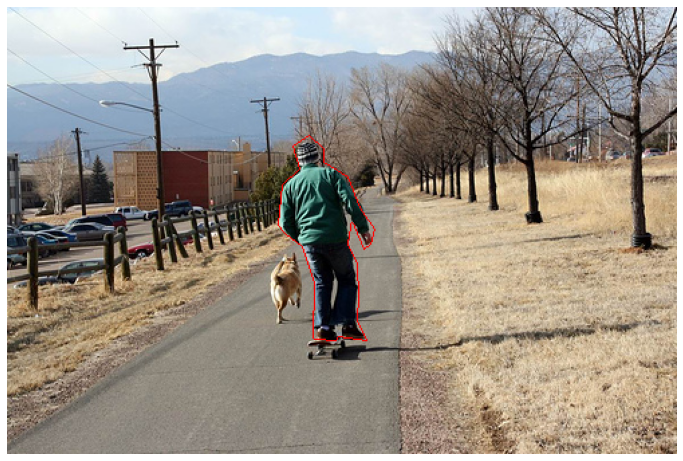

In [58]:
draw_img = image_array.copy()

s_mask_int = (masked_bool * 255).astype("uint8")
contours, hierarchy = cv2.findContours(s_mask_int, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
masked_image = cv2.drawContours(draw_img, contours, -1, (255, 0, 0), 1, cv2.LINE_8, hierarchy, 100)

plt.figure(figsize=(12, 14))
plt.imshow(masked_image)
plt.axis('off')

### Segmentation 코드 함수화

In [62]:
def get_polygon_xy(ann_seg):
  polygon_x = [x for index, x in enumerate(ann_seg) if index % 2 == 0]
  polygon_y = [x for index, x in enumerate(ann_seg) if index % 2 == 1]
  polygon_xy = [[x, y] for x, y in zip(polygon_x, polygon_y)]
  polygon_xy = np.array(polygon_xy, np.int32)
  return polygon_xy

def get_mask(image_array_shape, polygon_xy):
  mask = np.zeros(image_array_shape) # (324,550)
  masked_polygon = cv2.fillPoly(mask, [polygon_xy], 1) # polygon 좌표값에만 해당되는 애들만 111111
  
  return masked_polygon

def apply_mask(image, mask, color, alpha=0.5):
  for c in range(3):
    image[:, :, c] = np.where(mask == 1,
                              image[:, :, c] *
                              (1 - alpha) + alpha * color[c] * 255,
                              image[:, :, c])
  return image

# ann_seg_list에 있는 object들의 segmentation에 따라 instance segmentation 시각화. 
def draw_segment(image_array, ann_seg_list, color_list, alpha):
  '''
  image_array : 원본 이미지
  ann_seg_list : 여러 개의 segmentation 정보

  '''
  
  draw_image = image_array.copy()
  mask_array_shape = draw_image.shape[0:2] #(334,500)

  # list형태로 입력된 segmentation 정보들을 각각 시각화
  for index, ann_seg in enumerate(ann_seg_list):

    # polygon 좌표로 변환. 
    polygon_xy = get_polygon_xy(ann_seg)

    # mask 정보 변환
    masked_polygon = get_mask(mask_array_shape, polygon_xy)

    # segmentation color와 외곽선용 color 선택 
    # Randomly color choosing
    color_object = color_list[np.random.randint(len(color_list))]
    color_contour = color_list[np.random.randint(len(color_list))]
    
    # masking 적용. 
    masked_image = apply_mask(draw_image, masked_polygon, color_object, alpha=0.6)
    
    # 외곽선 적용. 
    s_mask_int = (masked_polygon*255).astype("uint8")
    contours, hierarchy = cv2.findContours(s_mask_int, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    masked_image = cv2.drawContours(masked_image, contours, -1, color_contour, 1, cv2.LINE_8, hierarchy, 100)

  return masked_image


In [60]:
color_list = [
              (0, 255, 0),
              (255, 0, 0),
              (0, 0, 255)
]
anns = coco.loadAnns(annIds)

# ann['segmentation][0] : class something [1] : " / [2] : person
ann_seg_list = [ann['segmentation'][0] for ann in anns]
print(ann_seg_list)

[[216.7, 211.89, 216.16, 217.81, 215.89, 220.77, 215.89, 223.73, 217.77, 225.35, 219.12, 224.54, 219.12, 220.5, 219.66, 217.27, 219.93, 212.7, 220.46, 207.85, 219.66, 203.01, 218.85, 198.43, 217.77, 195.74, 216.7, 194.93, 215.62, 190.62, 215.62, 186.59, 214.27, 183.89, 211.85, 184.16, 211.85, 187.66, 210.24, 187.66, 209.16, 184.97, 207.81, 183.36, 205.12, 186.59, 205.12, 189.28, 201.08, 192.78, 199.74, 195.2, 196.78, 200.04, 196.51, 203.01, 198.12, 205.43, 197.32, 209.2, 196.78, 213.23, 197.05, 218.89, 199.74, 221.85, 201.62, 225.35, 201.62, 233.69, 201.08, 236.11, 202.97, 236.38, 204.85, 236.11, 204.58, 232.34, 203.78, 228.85, 205.39, 233.15, 207.81, 235.57, 208.62, 234.23, 206.74, 231.27, 205.12, 228.04, 206.74, 222.39, 208.35, 219.96, 210.77, 217.54, 211.85, 221.85, 214.54, 223.73, 212.93, 217.54, 212.93, 215.66, 215.89, 212.96, 216.16, 212.16], [223.48, 251.26, 230.81, 246.74, 234.48, 247.6, 241.8, 247.6, 247.41, 243.72, 248.7, 244.15, 252.15, 249.54, 252.15, 254.71, 249.78, 255.79

(-0.5, 499.5, 333.5, -0.5)

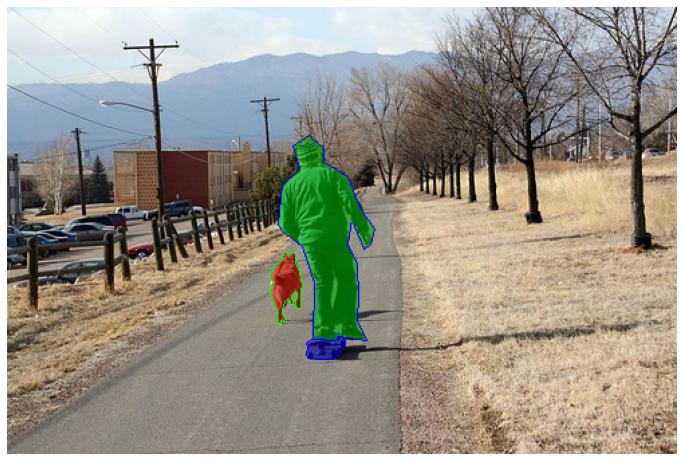

In [63]:
masked_image = draw_segment(image_array, ann_seg_list, color_list, alpha=0.6)
plt.figure(figsize=(12, 14))
plt.imshow(masked_image)
plt.axis('off')